In [25]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Configure matplotlib to show plots inline
%matplotlib inline

In [26]:
# Cell 2: Load raw data
raw_dir = "../data/raw"

# Load all raw files
raw_data = {}
for file in os.listdir(raw_dir):
    if file.startswith("raw_") and file.endswith(".csv"):
        ticker = file.replace("raw_", "").replace(".csv", "")
        df = pd.read_csv(os.path.join(raw_dir, file))
        raw_data[ticker] = df

print(f"✅ Loaded raw data for {len(raw_data)} tickers")
print(f"Tickers: {', '.join(sorted(raw_data.keys()))}")

✅ Loaded raw data for 3 tickers
Tickers: AAPL, GOOG, MSFT


In [27]:
# Cell 3: Overall data quality summary
print("="*80)
print("RAW DATA QUALITY SUMMARY")
print("="*80)

summary_stats = []
for ticker, df in raw_data.items():
    # Convert Date to datetime if it exists
    if 'Date' in df.columns:
        try:
            df['Date'] = pd.to_datetime(df['Date'])
            date_range = f"{df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}"
        except:
            date_range = 'N/A'
    else:
        date_range = 'N/A'
    
    summary_stats.append({
        'Ticker': ticker,
        'Rows': len(df),
        'Columns': len(df.columns),
        'Missing Values': df.isna().sum().sum(),
        'Missing %': round(df.isna().sum().sum() / (len(df) * len(df.columns)) * 100, 2),
        'Duplicates': df.duplicated().sum(),
        'Date Range': date_range
    })

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

RAW DATA QUALITY SUMMARY
Ticker  Rows  Columns  Missing Values  Missing %  Duplicates               Date Range
  AAPL  1257        6               1       0.01           0 2020-11-30 to 2025-11-28
  GOOG  1257        6               1       0.01           0 2020-11-30 to 2025-11-28
  MSFT  1257        6               1       0.01           0 2020-11-30 to 2025-11-28


In [28]:
# Cell 4: Select tickers to analyze in detail
# You can change this list to analyze specific tickers
tickers_to_analyze = list(raw_data.keys())[:5]  # First 5 tickers by default

print(f"Analyzing in detail: {', '.join(tickers_to_analyze)}")
print(f"(Change 'tickers_to_analyze' variable to select different tickers)")

Analyzing in detail: AAPL, GOOG, MSFT
(Change 'tickers_to_analyze' variable to select different tickers)


In [29]:
# Cell 5: Detailed preview for selected tickers
for ticker in tickers_to_analyze:
    if ticker in raw_data:
        df = raw_data[ticker]
        print(f"\n{'='*80}")
        print(f"📊 {ticker} - RAW DATA PREVIEW")
        print(f"{'='*80}")
        print(df.head(10))
        print(f"\nShape: {df.shape}")
        print(f"Columns: {list(df.columns)}")


📊 AAPL - RAW DATA PREVIEW
        Date               Close                High                 Low  \
0        NaT                AAPL                AAPL                AAPL   
1 2020-11-30  115.88951110839844  117.75853793262587  113.70897238661402   
2 2020-12-01  119.46206665039062  120.19215587053868  116.82401182614447   
3 2020-12-02  119.81251525878906   120.0948173273605  117.68065226704212   
4 2020-12-03  119.67623138427734  120.49392777356492  118.96560791819012   
5 2020-12-04  119.00455474853516   119.5983613009378  118.29393123559595   
6 2020-12-07  120.46472930908203  121.26295994561156  119.00455077200225   
7 2020-12-08   121.0780029296875  121.66208029231422  119.82224848300353   
8 2020-12-09  118.54701232910156  122.60630637821869  117.78772077192583   
9 2020-12-10     119.96826171875  120.58154143292921  116.96029761781081   

                 Open     Volume  
0                AAPL       AAPL  
1  113.86472833539251  169410200  
2  117.79746411967523  12772820

In [30]:
# Cell 6: Data types and basic info
for ticker in tickers_to_analyze:
    if ticker in raw_data:
        df = raw_data[ticker]
        print(f"\n{'='*80}")
        print(f"🔍 {ticker} - DATA TYPES & INFO")
        print(f"{'='*80}")
        print(df.info())
        print(f"\nData Types:\n{df.dtypes}")


🔍 AAPL - DATA TYPES & INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1256 non-null   datetime64[ns]
 1   Close   1257 non-null   object        
 2   High    1257 non-null   object        
 3   Low     1257 non-null   object        
 4   Open    1257 non-null   object        
 5   Volume  1257 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 59.1+ KB
None

Data Types:
Date      datetime64[ns]
Close             object
High              object
Low               object
Open              object
Volume            object
dtype: object

🔍 GOOG - DATA TYPES & INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1256 non-null   datetime64[ns]
 1   C

In [31]:
# Cell 7: Missing values analysis
for ticker in tickers_to_analyze:
    if ticker in raw_data:
        df = raw_data[ticker]
        print(f"\n{'='*80}")
        print(f"❌ {ticker} - MISSING VALUES")
        print(f"{'='*80}")
        missing = df.isna().sum()
        if missing.sum() == 0:
            print("✅ No missing values!")
        else:
            missing_df = pd.DataFrame({
                'Column': missing.index,
                'Missing Count': missing.values,
                'Missing %': [round((val / len(df)) * 100, 2) for val in missing.values]
            })
            print(missing_df[missing_df['Missing Count'] > 0].to_string(index=False))


❌ AAPL - MISSING VALUES
Column  Missing Count  Missing %
  Date              1       0.08

❌ GOOG - MISSING VALUES
Column  Missing Count  Missing %
  Date              1       0.08

❌ MSFT - MISSING VALUES
Column  Missing Count  Missing %
  Date              1       0.08


In [32]:
# Cell 8: Summary statistics for selected tickers
for ticker in tickers_to_analyze:
    if ticker in raw_data:
        df = raw_data[ticker]
        print(f"\n{'='*80}")
        print(f"📈 {ticker} - SUMMARY STATISTICS")
        print(f"{'='*80}")
        print(df.describe())


📈 AAPL - SUMMARY STATISTICS
                                Date
count                           1256
mean   2023-05-30 14:49:40.891719680
min              2020-11-30 00:00:00
25%              2022-02-28 18:00:00
50%              2023-05-30 12:00:00
75%              2024-08-28 06:00:00
max              2025-11-28 00:00:00

📈 GOOG - SUMMARY STATISTICS
                                Date
count                           1256
mean   2023-05-30 14:49:40.891719680
min              2020-11-30 00:00:00
25%              2022-02-28 18:00:00
50%              2023-05-30 12:00:00
75%              2024-08-28 06:00:00
max              2025-11-28 00:00:00

📈 MSFT - SUMMARY STATISTICS
                                Date
count                           1256
mean   2023-05-30 14:49:40.891719680
min              2020-11-30 00:00:00
25%              2022-02-28 18:00:00
50%              2023-05-30 12:00:00
75%              2024-08-28 06:00:00
max              2025-11-28 00:00:00


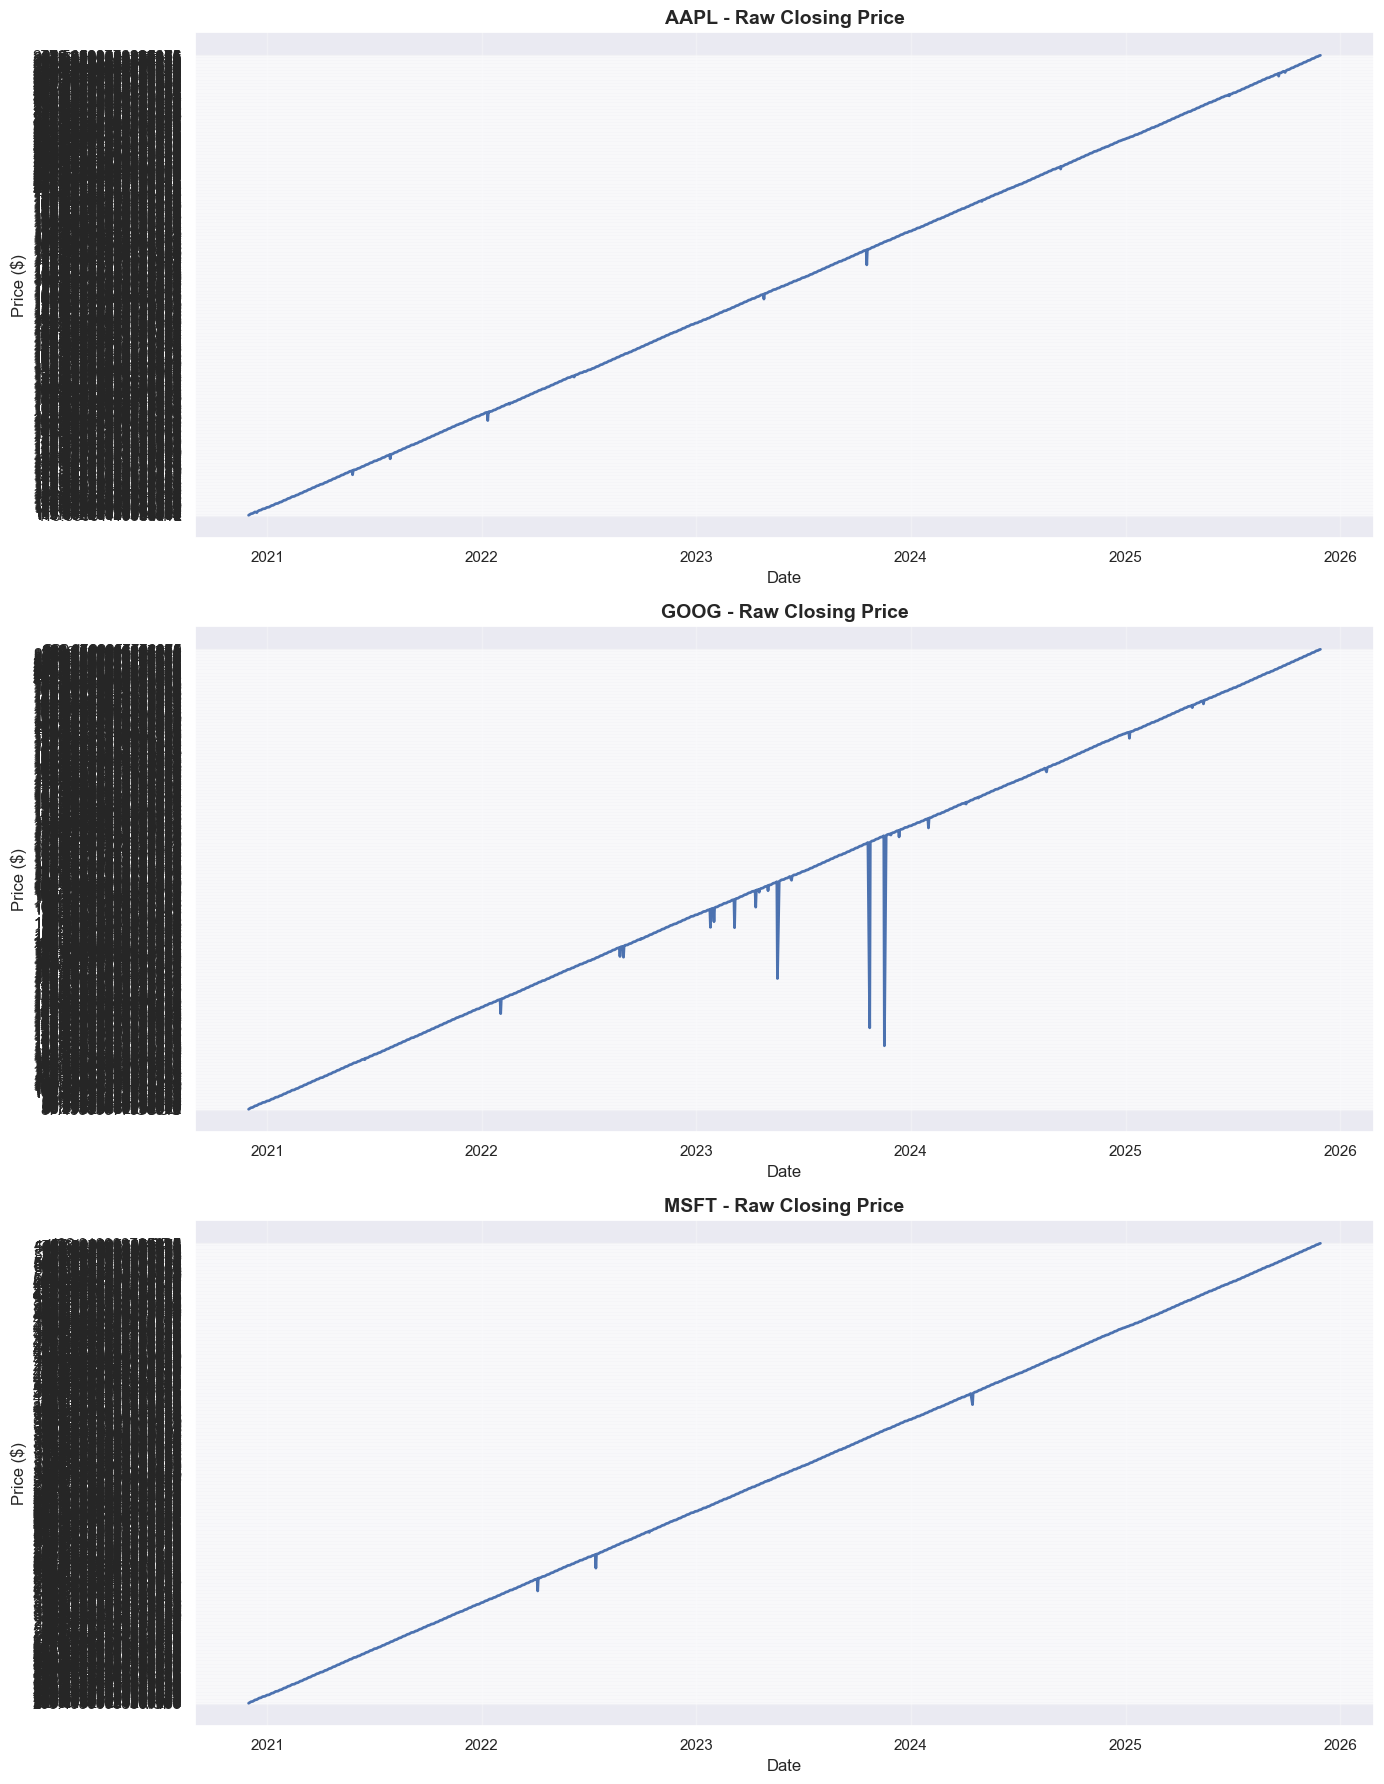

In [33]:
# Cell 9: Visualize raw closing prices for selected tickers
fig, axes = plt.subplots(len(tickers_to_analyze), 1, figsize=(14, 6*len(tickers_to_analyze)))
if len(tickers_to_analyze) == 1:
    axes = [axes]

for idx, ticker in enumerate(tickers_to_analyze):
    if ticker in raw_data:
        df = raw_data[ticker]
        if 'Close' in df.columns and 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            axes[idx].plot(df['Date'], df['Close'], linewidth=2)
            axes[idx].set_title(f'{ticker} - Raw Closing Price', fontsize=14, fontweight='bold')
            axes[idx].set_xlabel('Date', fontsize=12)
            axes[idx].set_ylabel('Price ($)', fontsize=12)
            axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [34]:
# Cell 10: Check for outliers and anomalies
for ticker in tickers_to_analyze:
    if ticker in raw_data:
        df = raw_data[ticker]
        print(f"\n{'='*80}")
        print(f"⚠️ {ticker} - OUTLIERS CHECK")
        print(f"{'='*80}")
        
        numeric_cols = df.select_dtypes(include='number').columns
        for col in numeric_cols:
            # Check for zeros or negative values in price/volume
            if col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
                invalid = df[df[col] <= 0]
                if len(invalid) > 0:
                    print(f"❌ {col}: Found {len(invalid)} rows with values <= 0")
            
            if col == 'Volume':
                invalid = df[df[col] < 0]
                if len(invalid) > 0:
                    print(f"❌ {col}: Found {len(invalid)} rows with negative values")
        
        # Check for extreme values using IQR method
        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[col] < Q1 - 3*IQR) | (df[col] > Q3 + 3*IQR)]
            if len(outliers) > 0:
                print(f"⚠️ {col}: Found {len(outliers)} potential outliers (using 3*IQR)")


⚠️ AAPL - OUTLIERS CHECK

⚠️ GOOG - OUTLIERS CHECK

⚠️ MSFT - OUTLIERS CHECK


# preprocessed data viz

In [35]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Configure matplotlib to show plots inline
%matplotlib inline

In [36]:
# Cell 2: Load preprocessed data
processed_dir = "../data/processed"

# Load all preprocessed files
preprocessed_data = {}
for file in os.listdir(processed_dir):
    if file.startswith("preprocessed_") and file.endswith(".csv"):
        ticker = file.replace("preprocessed_", "").replace(".csv", "")
        df = pd.read_csv(os.path.join(processed_dir, file))
        # Convert Date column if exists
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
        preprocessed_data[ticker] = df

print(f"✅ Loaded preprocessed data for {len(preprocessed_data)} tickers")
print(f"Total tickers: {', '.join(sorted(preprocessed_data.keys())[:10])}{'...' if len(preprocessed_data) > 10 else ''}")
print(f"\nTotal: {len(preprocessed_data)} tickers")

✅ Loaded preprocessed data for 3 tickers
Total tickers: AAPL, GOOG, MSFT

Total: 3 tickers


In [37]:
# Cell 3: Select tickers to visualize
selected_tickers = list(preprocessed_data.keys())[:5]

# Filter to only tickers that exist in the data
selected_tickers = [t for t in selected_tickers if t in preprocessed_data]

print(f"📊 Visualizing: {', '.join(selected_tickers)}")
print(f"(Change 'selected_tickers' to analyze different stocks)")

📊 Visualizing: AAPL, GOOG, MSFT
(Change 'selected_tickers' to analyze different stocks)


In [38]:
# Cell 4: Overall dataset statistics
print("="*80)
print("PREPROCESSED DATA SUMMARY")
print("="*80)

summary_stats = []
for ticker, df in preprocessed_data.items():
    summary_stats.append({
        'Ticker': ticker,
        'Rows': len(df),
        'Start Date': df['Date'].min() if 'Date' in df.columns else 'N/A',
        'End Date': df['Date'].max() if 'Date' in df.columns else 'N/A',
        'Avg Close': round(df['Close'].mean(), 2) if 'Close' in df.columns else 'N/A',
        'Missing Values': df.isna().sum().sum()
    })

summary_df = pd.DataFrame(summary_stats).sort_values('Ticker')
print(summary_df.head(20).to_string(index=False))
if len(summary_df) > 20:
    print(f"\n... and {len(summary_df) - 20} more tickers")

PREPROCESSED DATA SUMMARY
Ticker  Rows Start Date   End Date  Avg Close  Missing Values
  AAPL  1237 2020-12-28 2025-11-28     177.66               0
  GOOG  1237 2020-12-28 2025-11-28     143.62               0
  MSFT  1237 2020-12-28 2025-11-28     339.80               0


In [39]:
# Cell 5: Preview selected tickers
for ticker in selected_tickers:
    df = preprocessed_data[ticker]
    print(f"\n{'='*80}")
    print(f"📊 {ticker} - Preview")
    print(f"{'='*80}")
    print(df.head(10))
    print(f"\nShape: {df.shape}")


📊 AAPL - Preview
        Date       Close        High         Low        Open     Volume  \
0 2020-12-28  133.061203  133.693941  129.965617  130.432885  124486200   
1 2020-12-29  131.289490  135.105420  130.773561  134.385075  121047300   
2 2020-12-30  130.170044  132.379785  129.858532  131.980666   96452100   
3 2020-12-31  129.167419  131.163000  128.223169  130.520518   99116600   
4 2021-01-04  125.974464  130.062961  123.394814  129.975354  143301900   
5 2021-01-05  127.532005  128.242636  125.020496  125.468291   97664900   
6 2021-01-06  123.239059  127.570927  123.024899  124.329329  155088000   
7 2021-01-07  127.444389  128.135547  124.465627  124.952354  109578200   
8 2021-01-08  128.544403  129.109007  126.772712  128.914305  105158200   
9 2021-01-11  125.555870  126.714281  125.088617  125.760302  100384500   

   daily_return        MA_5       MA_20  
0      0.035766  128.443143  122.565435  
1     -0.013315  129.735881  123.335434  
2     -0.008527  130.094115  1

In [40]:
# Cell 6: Summary statistics for selected tickers
for ticker in selected_tickers:
    df = preprocessed_data[ticker]
    print(f"\n{'='*80}")
    print(f"📈 {ticker} - Summary Statistics")
    print(f"{'='*80}")
    print(df.describe())


📈 AAPL - Summary Statistics
                                Date        Close         High          Low  \
count                           1237  1237.000000  1237.000000  1237.000000   
mean   2023-06-13 10:30:56.750202368   177.663076   179.426809   175.724068   
min              2020-12-28 00:00:00   113.440201   117.378811   113.293963   
25%              2022-03-21 00:00:00   145.823715   147.095424   144.268619   
50%              2023-06-13 00:00:00   171.277618   172.344651   169.307782   
75%              2024-09-05 00:00:00   207.858261   210.779240   205.497297   
max              2025-11-28 00:00:00   278.850006   280.380005   276.630005   
std                              NaN    38.313932    38.539792    38.016788   

              Open        Volume  daily_return         MA_5        MA_20  
count  1237.000000  1.237000e+03   1237.000000  1237.000000  1237.000000  
mean    177.479823  7.044060e+07      0.000782   177.420552   176.519316  
min     116.043170  2.013560e+07  

In [41]:
# Cell 7: Missing values check
for ticker in selected_tickers:
    df = preprocessed_data[ticker]
    print(f"\n{'='*80}")
    print(f"🔍 {ticker} - Missing Values")
    print(f"{'='*80}")
    missing = df.isna().sum()
    if missing.sum() == 0:
        print("✅ No missing values!")
    else:
        print(missing[missing > 0])


🔍 AAPL - Missing Values
✅ No missing values!

🔍 GOOG - Missing Values
✅ No missing values!

🔍 MSFT - Missing Values
✅ No missing values!


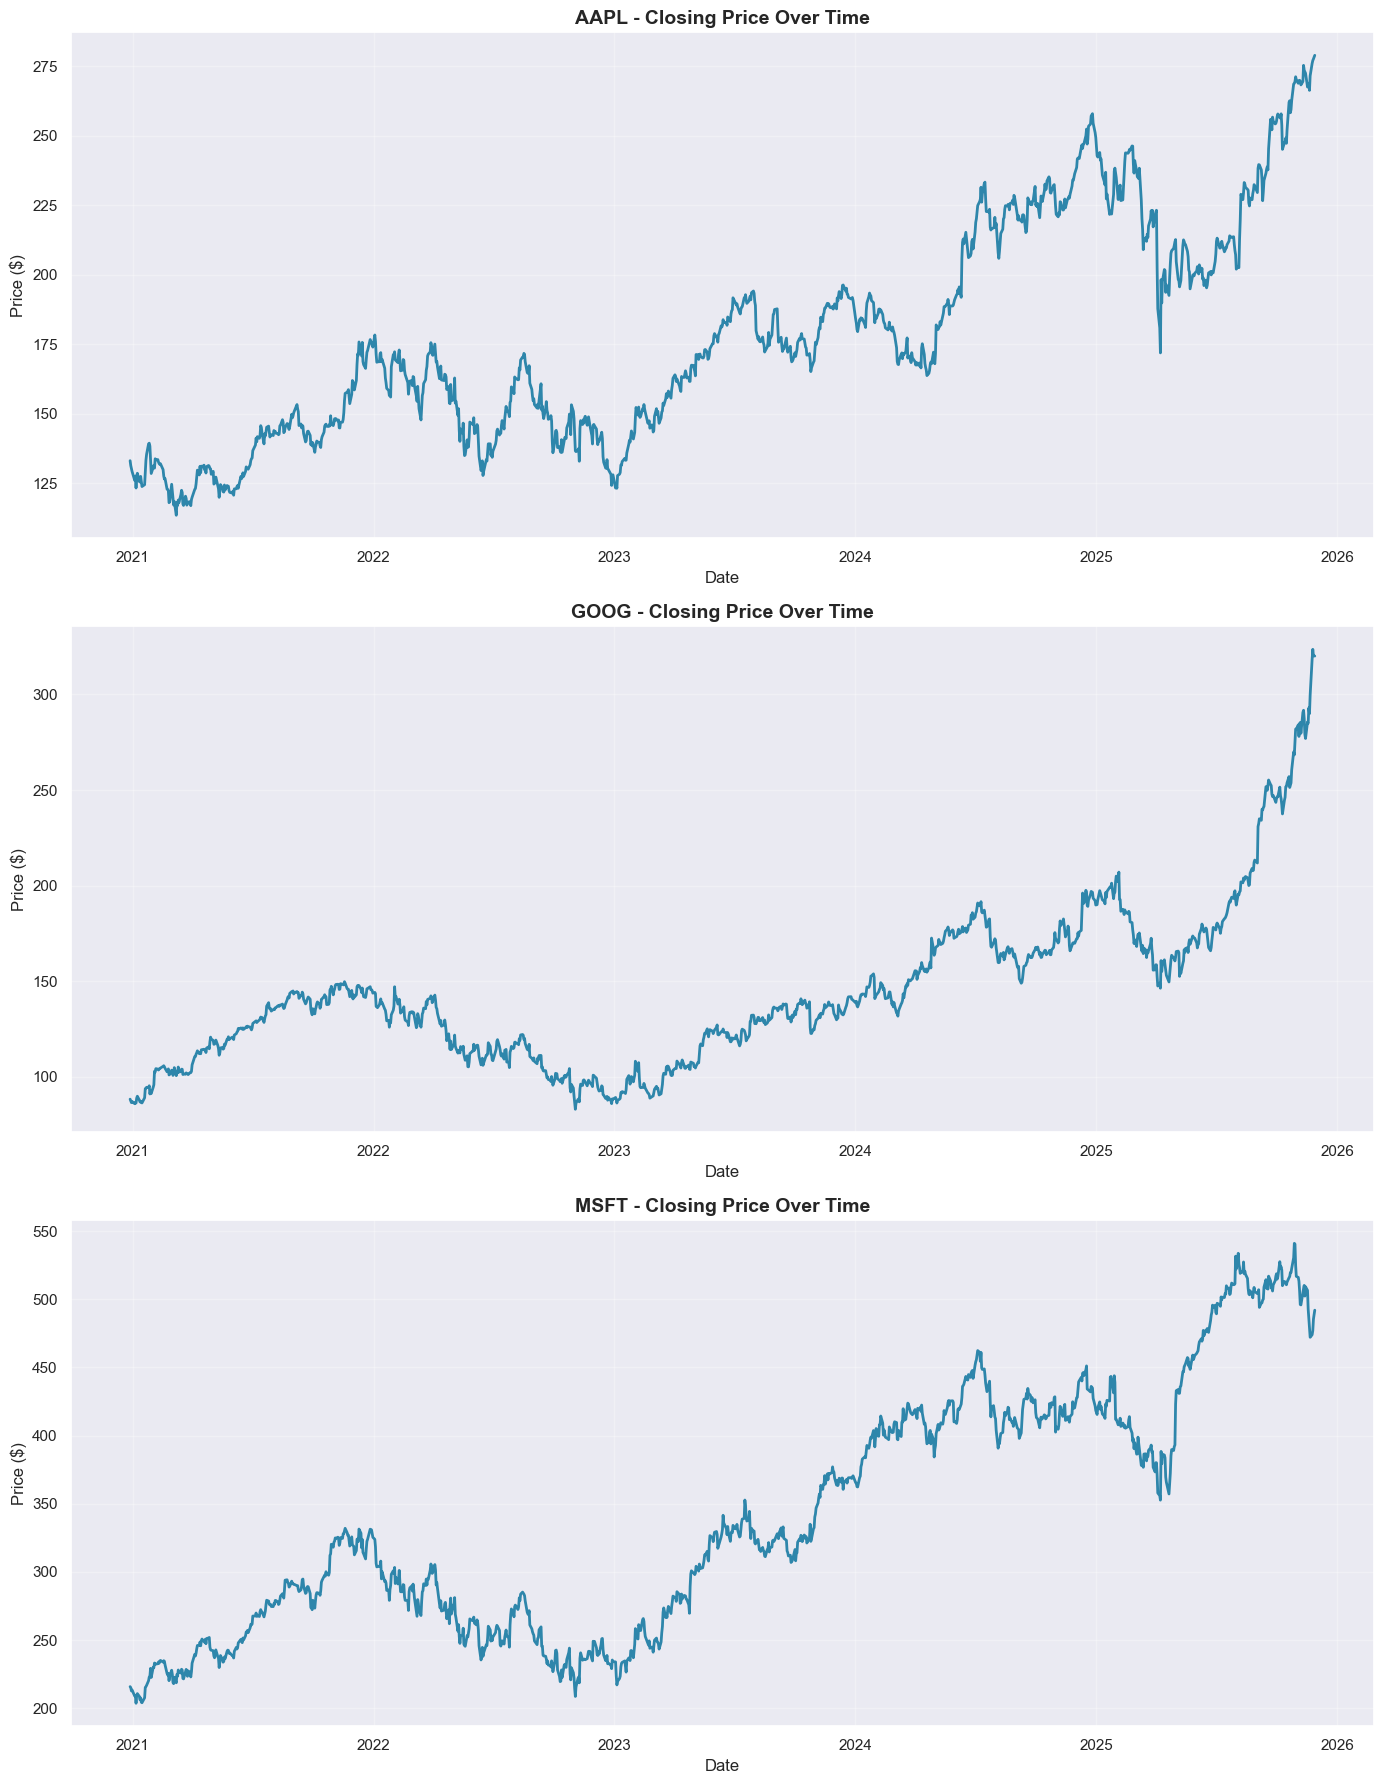

In [42]:
# Cell 8: Closing Price Over Time - Selected Tickers
fig, axes = plt.subplots(len(selected_tickers), 1, figsize=(14, 6*len(selected_tickers)))
if len(selected_tickers) == 1:
    axes = [axes]

for idx, ticker in enumerate(selected_tickers):
    df = preprocessed_data[ticker]
    if 'Close' in df.columns and 'Date' in df.columns:
        axes[idx].plot(df['Date'], df['Close'], linewidth=2, color='#2E86AB')
        axes[idx].set_title(f'{ticker} - Closing Price Over Time', fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Date', fontsize=12)
        axes[idx].set_ylabel('Price ($)', fontsize=12)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

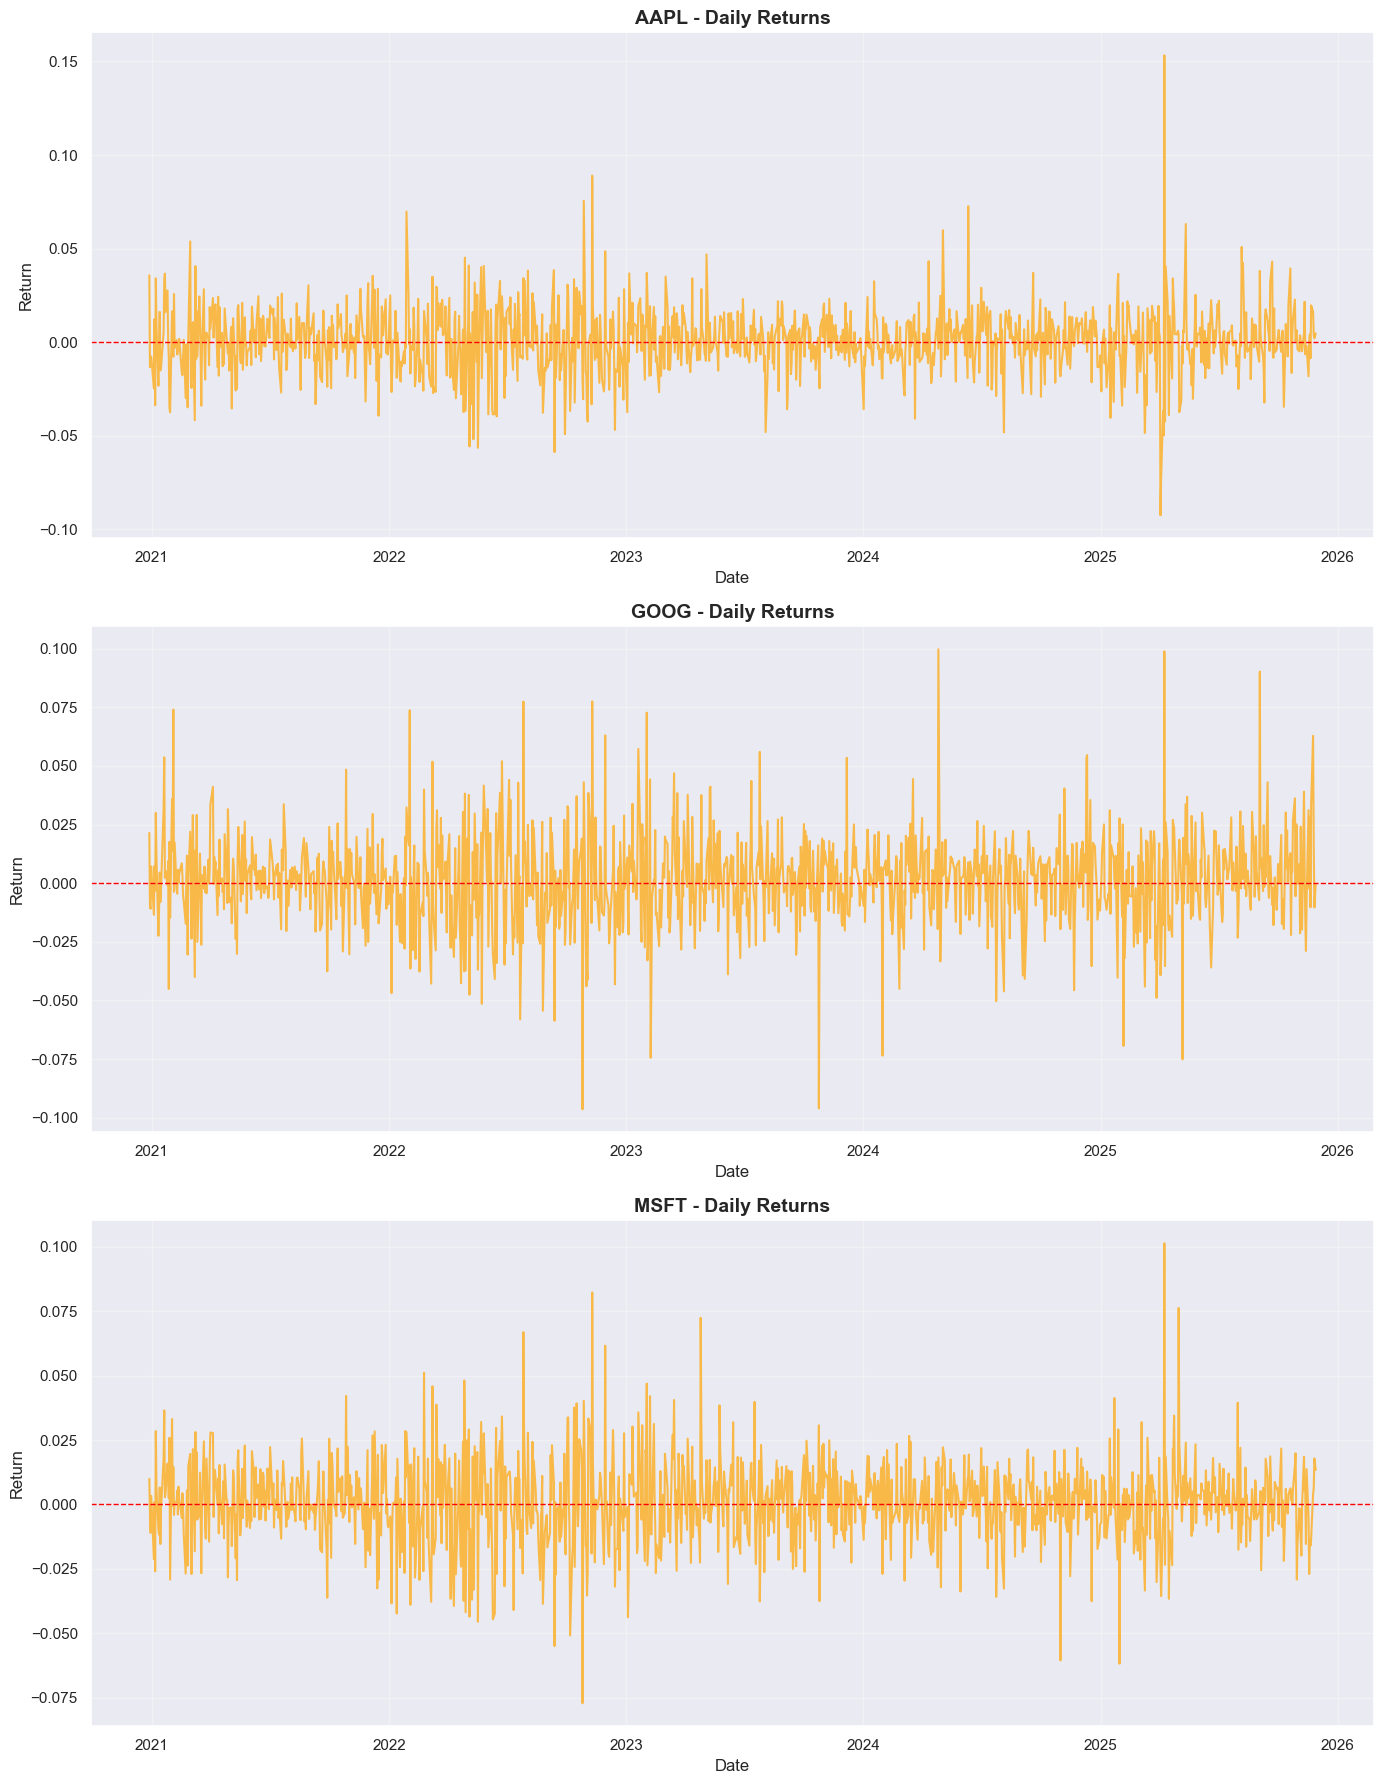

In [43]:
# Cell 9: Daily Returns - Selected Tickers
fig, axes = plt.subplots(len(selected_tickers), 1, figsize=(14, 6*len(selected_tickers)))
if len(selected_tickers) == 1:
    axes = [axes]

for idx, ticker in enumerate(selected_tickers):
    df = preprocessed_data[ticker]
    if 'daily_return' in df.columns and 'Date' in df.columns:
        axes[idx].plot(df['Date'], df['daily_return'], color='orange', linewidth=1.5, alpha=0.7)
        axes[idx].axhline(y=0, color='red', linestyle='--', linewidth=1)
        axes[idx].set_title(f'{ticker} - Daily Returns', fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Date', fontsize=12)
        axes[idx].set_ylabel('Return', fontsize=12)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

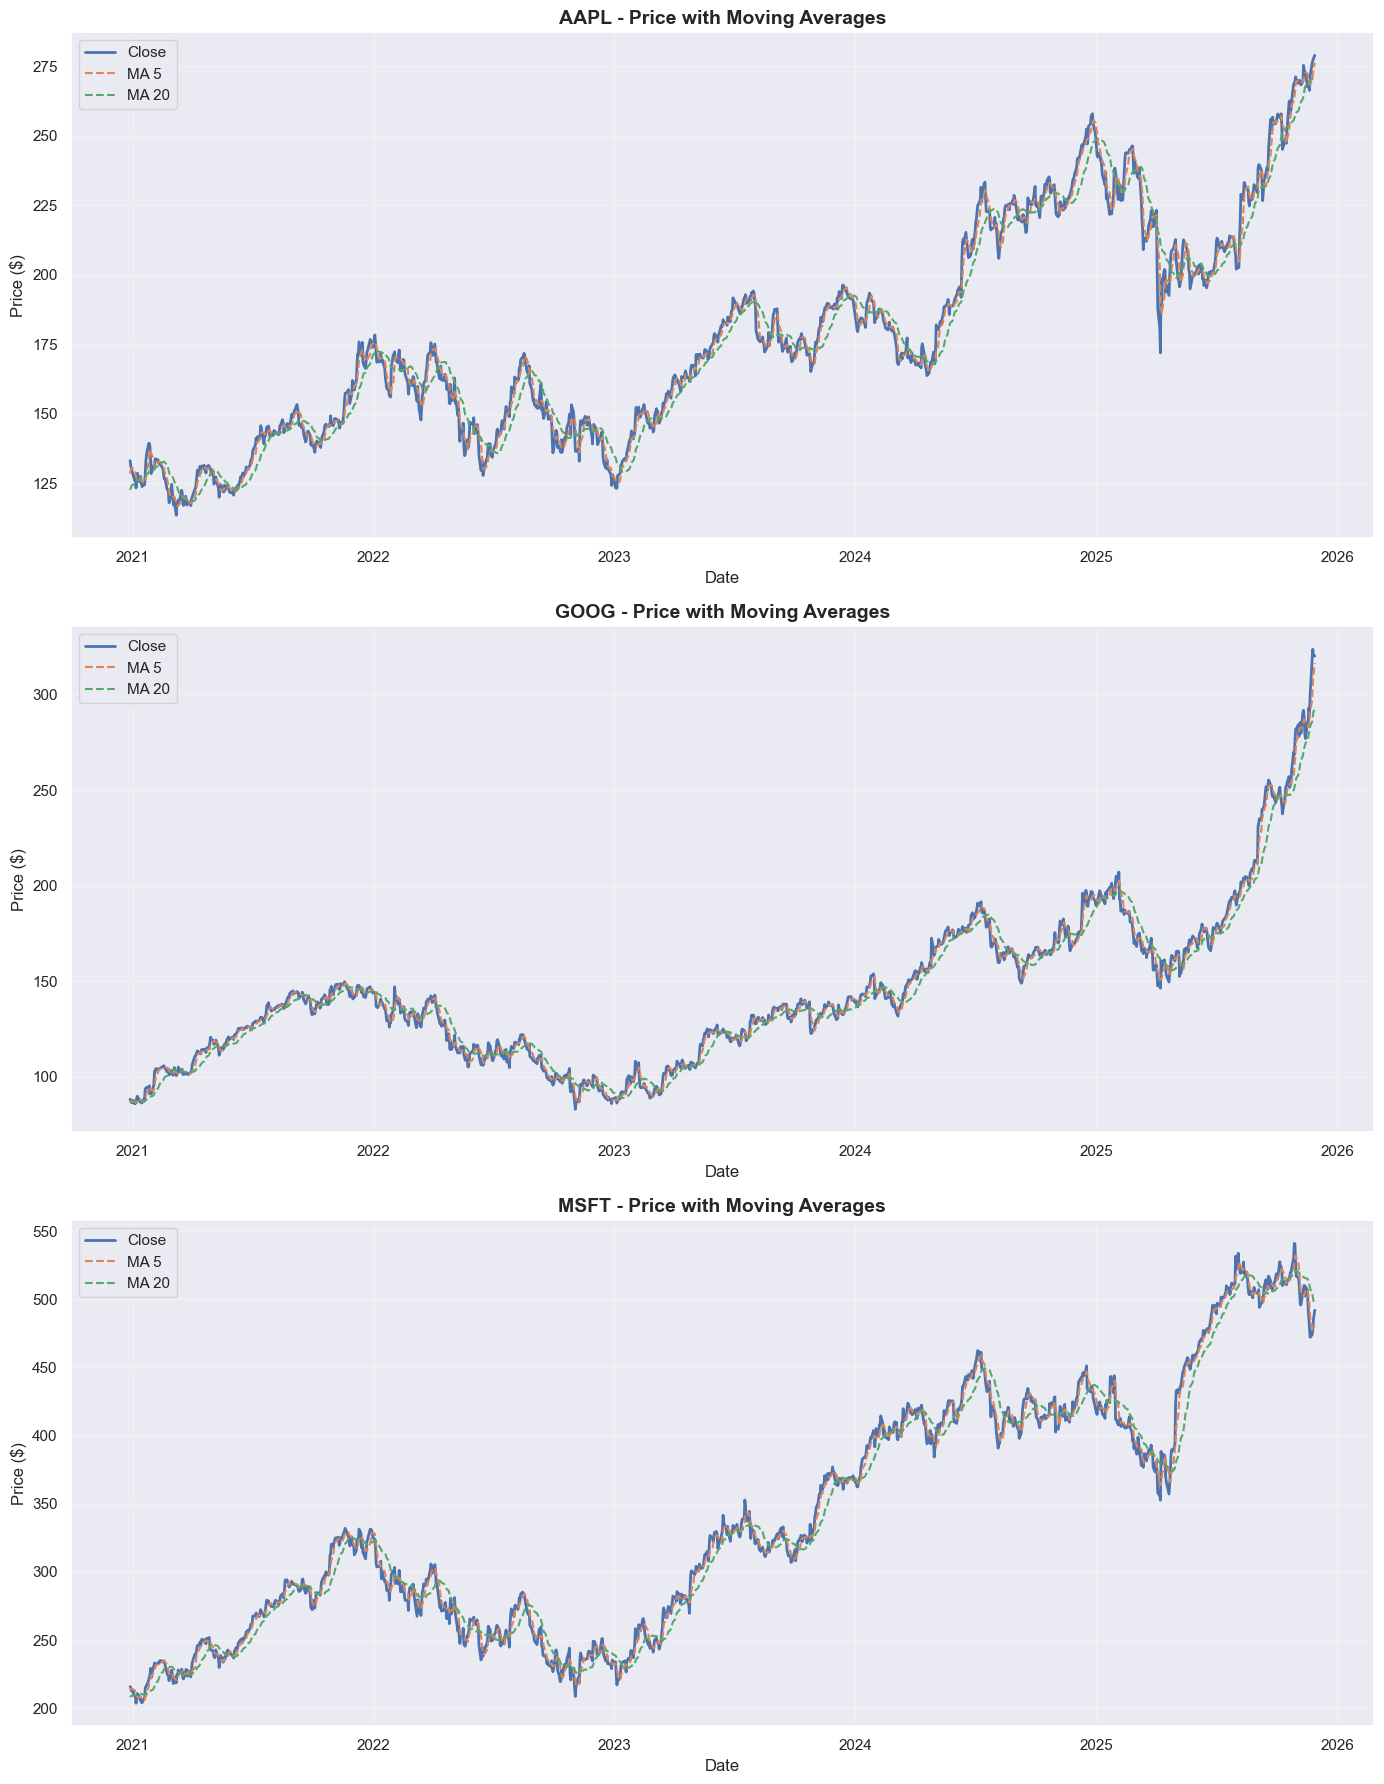

In [44]:
# Cell 10: Closing Price with Moving Averages - Selected Tickers
fig, axes = plt.subplots(len(selected_tickers), 1, figsize=(14, 6*len(selected_tickers)))
if len(selected_tickers) == 1:
    axes = [axes]

for idx, ticker in enumerate(selected_tickers):
    df = preprocessed_data[ticker]
    if all(col in df.columns for col in ['Close', 'MA_5', 'MA_20', 'Date']):
        axes[idx].plot(df['Date'], df['Close'], label='Close', linewidth=2)
        axes[idx].plot(df['Date'], df['MA_5'], label='MA 5', linewidth=1.5, linestyle='--')
        axes[idx].plot(df['Date'], df['MA_20'], label='MA 20', linewidth=1.5, linestyle='--')
        axes[idx].set_title(f'{ticker} - Price with Moving Averages', fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Date', fontsize=12)
        axes[idx].set_ylabel('Price ($)', fontsize=12)
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

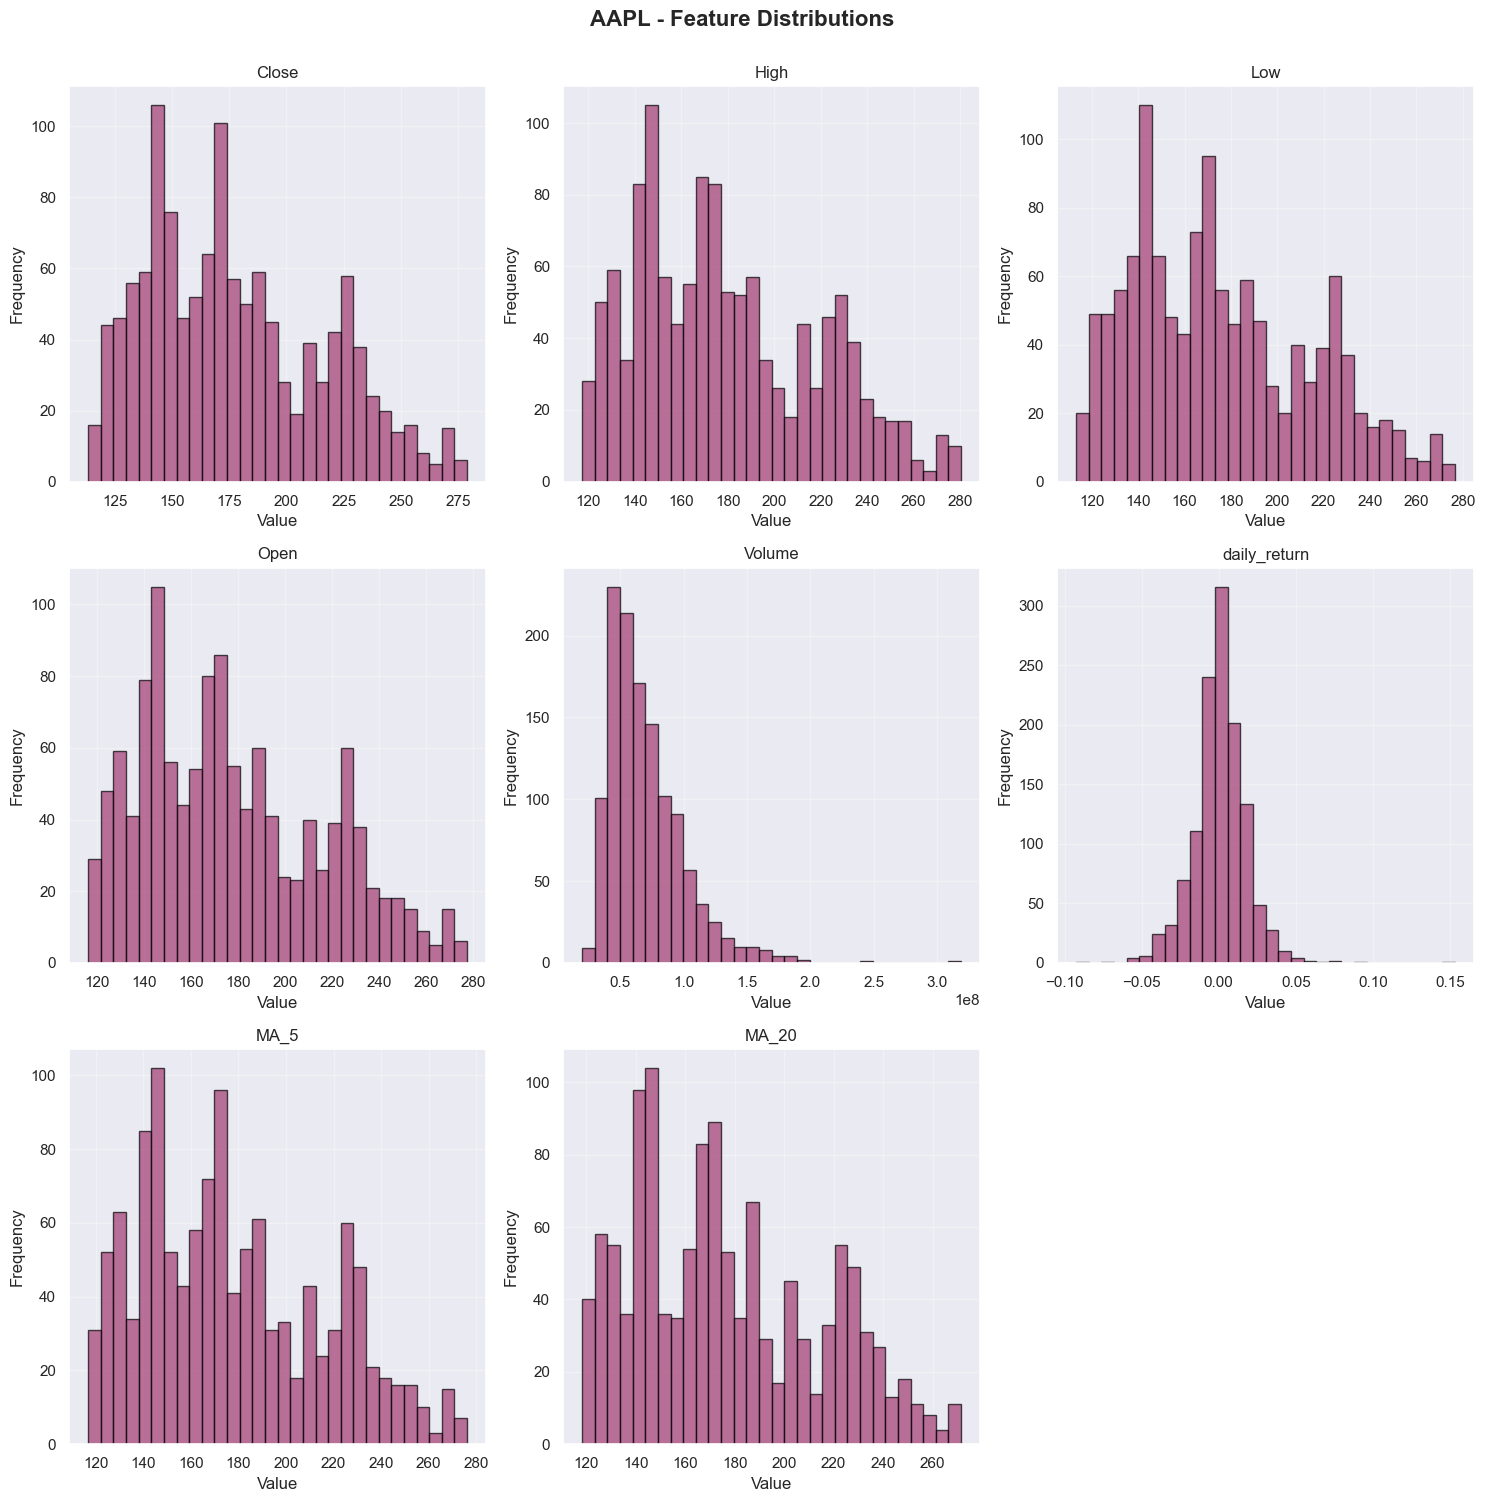

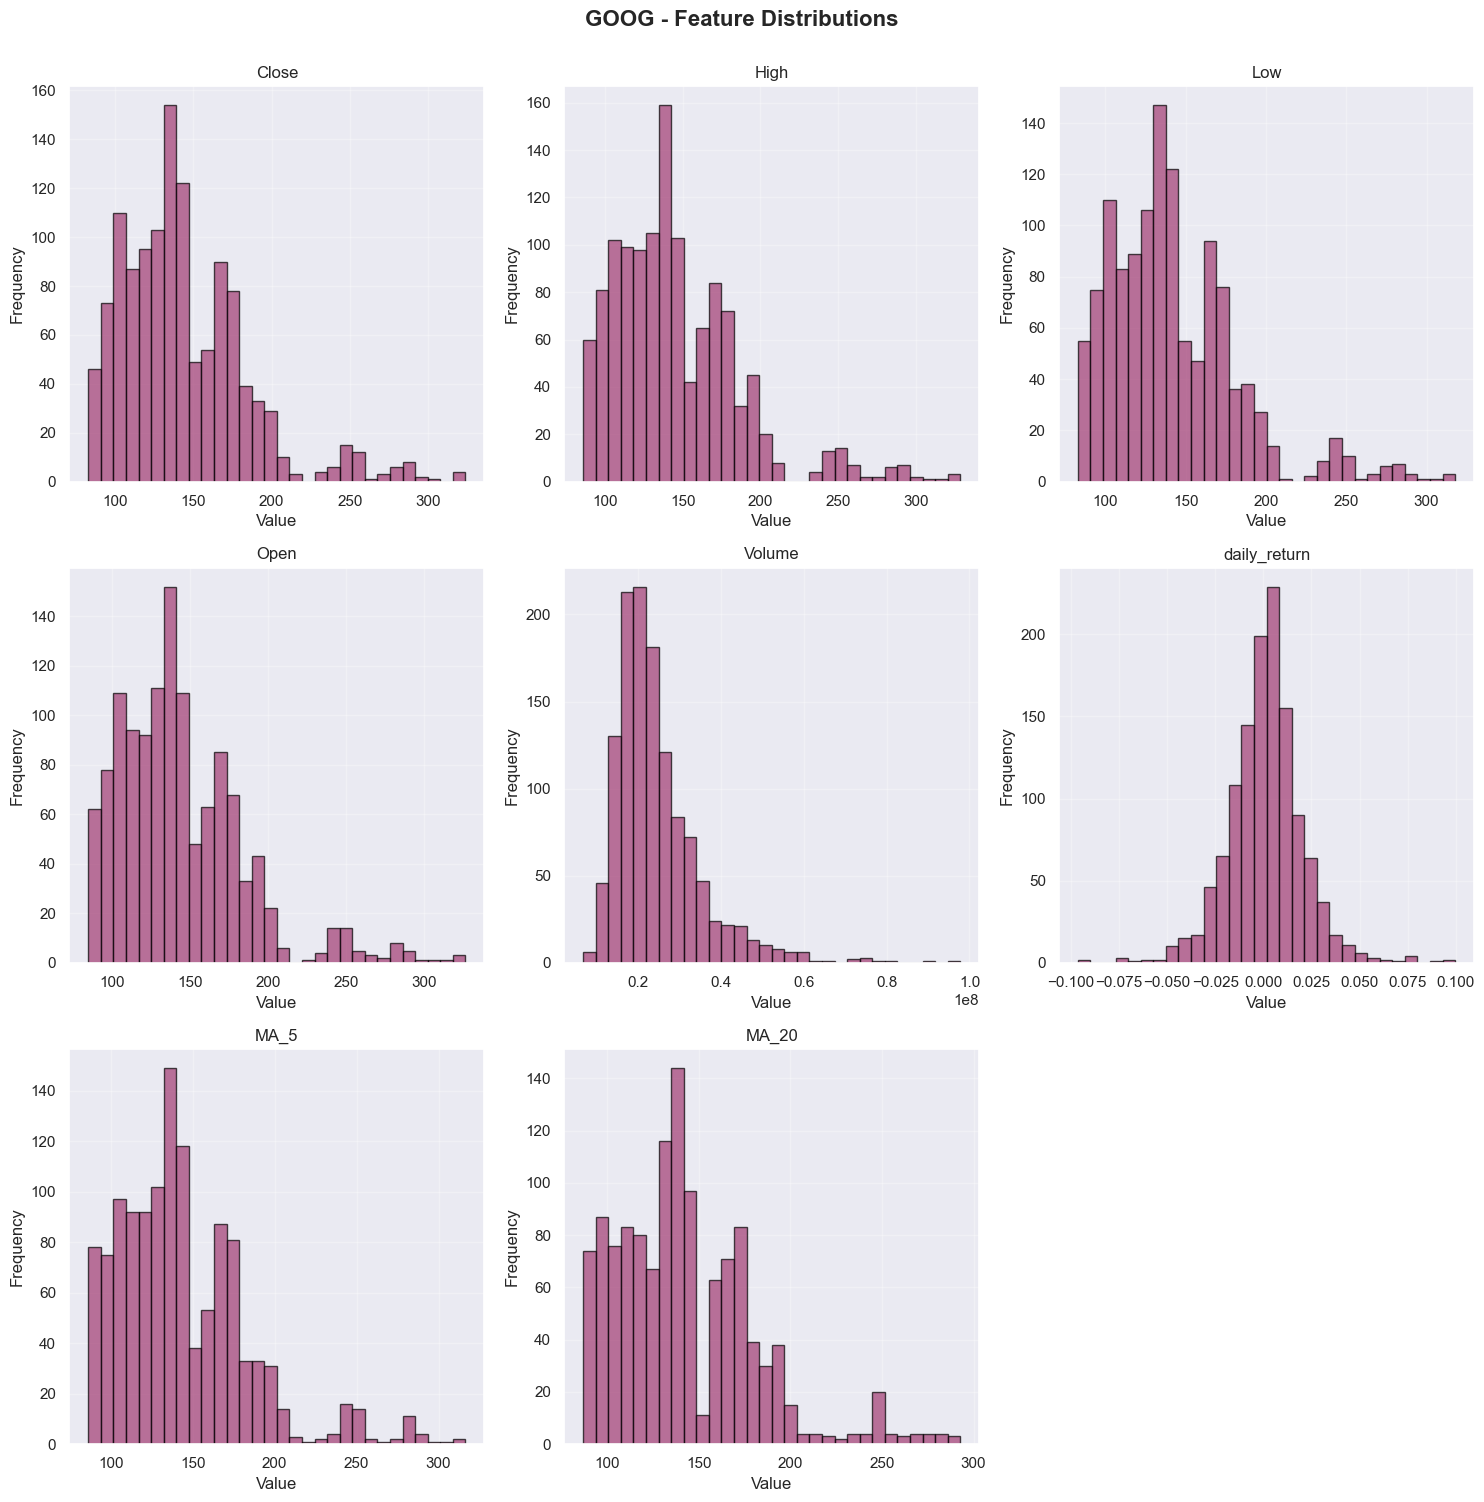

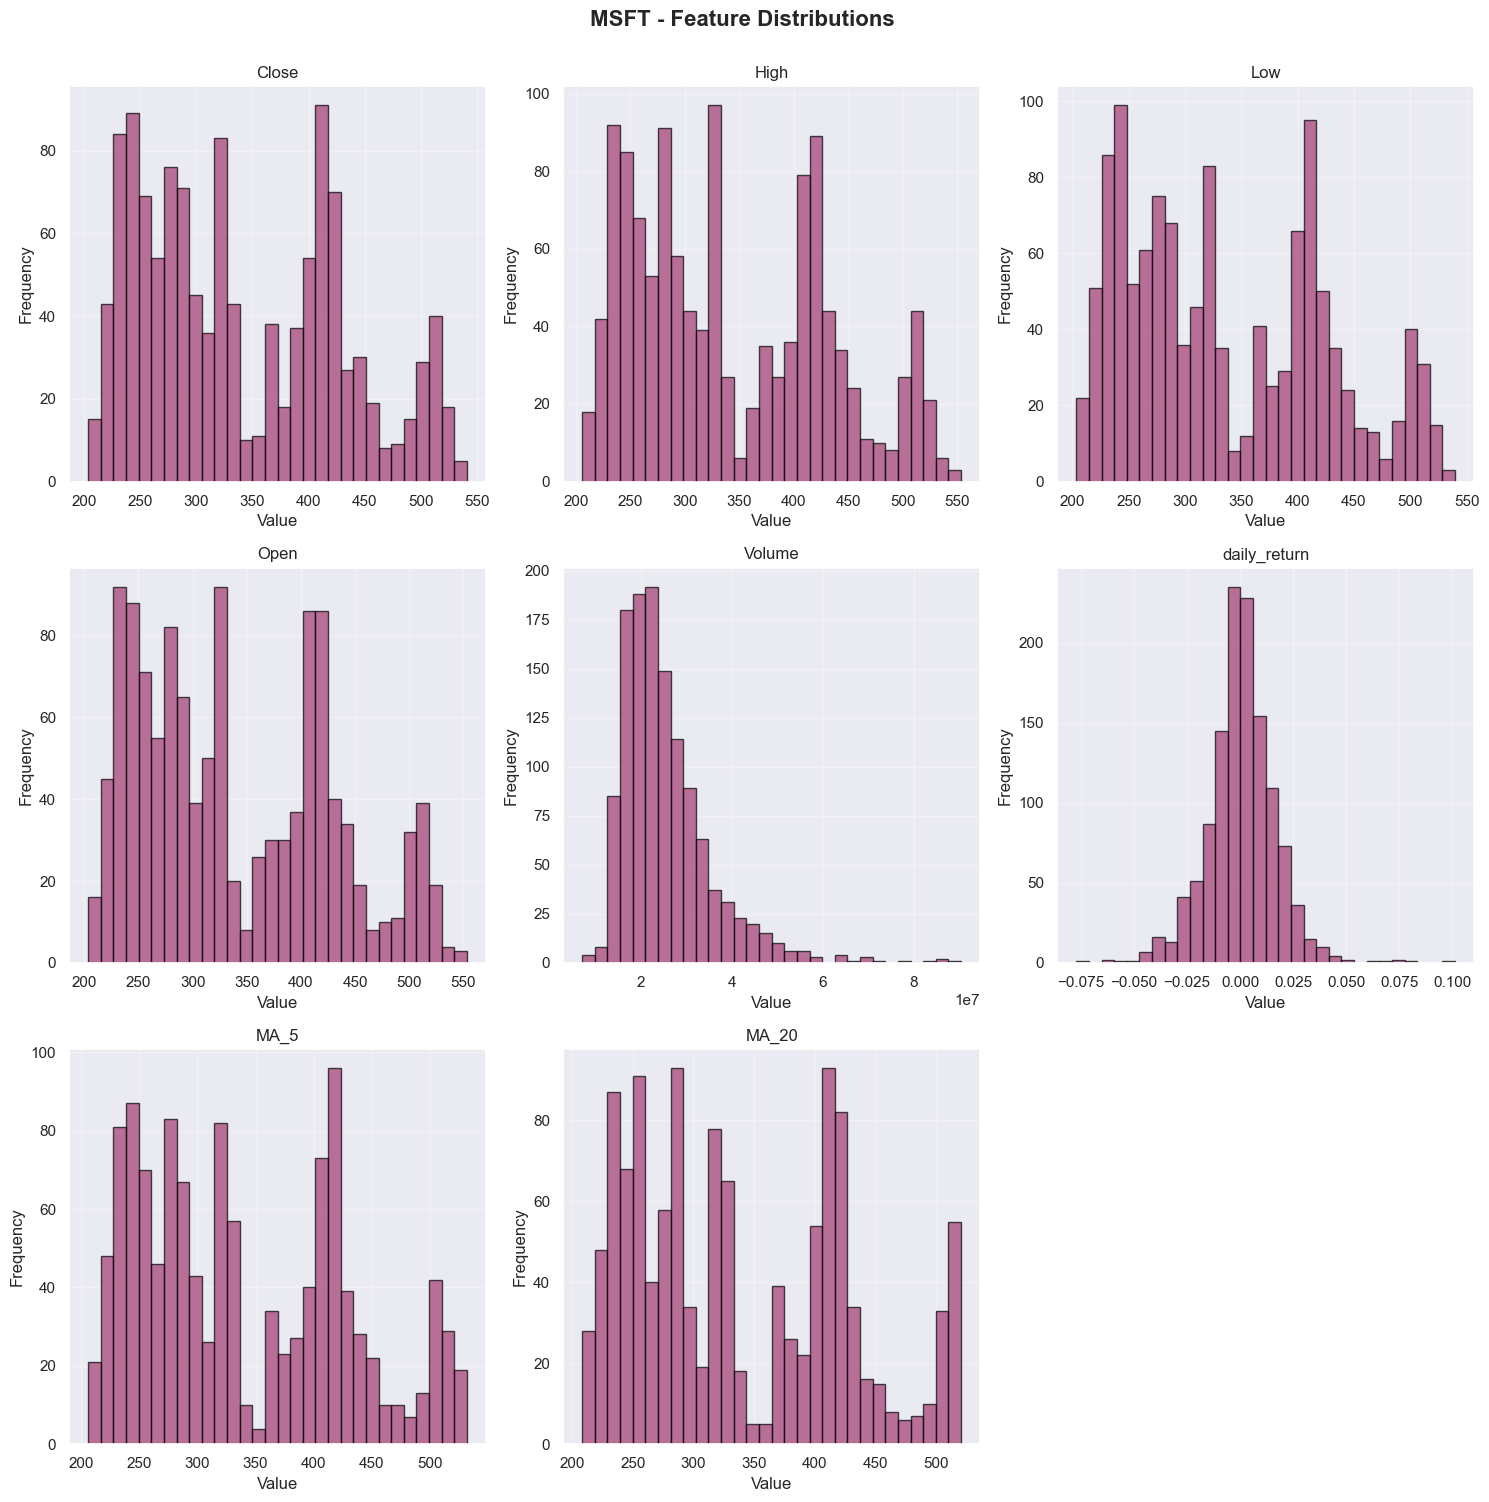

In [45]:
# Cell 11: Distribution of Features - Selected Tickers
for ticker in selected_tickers:
    df = preprocessed_data[ticker]
    numeric_cols = df.select_dtypes(include='number').columns
    n_cols = len(numeric_cols)
    
    if n_cols > 0:
        n_rows = (n_cols + 2) // 3  # 3 columns per row
        fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_cols > 1 else [axes]
        
        for i, col in enumerate(numeric_cols):
            axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='#A23B72')
            axes[i].set_title(f'{col}', fontsize=12)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
        
        # Hide unused subplots
        for i in range(n_cols, len(axes)):
            axes[i].axis('off')
        
        plt.suptitle(f'{ticker} - Feature Distributions', fontsize=16, fontweight='bold', y=1.00)
        plt.tight_layout()
        plt.show()

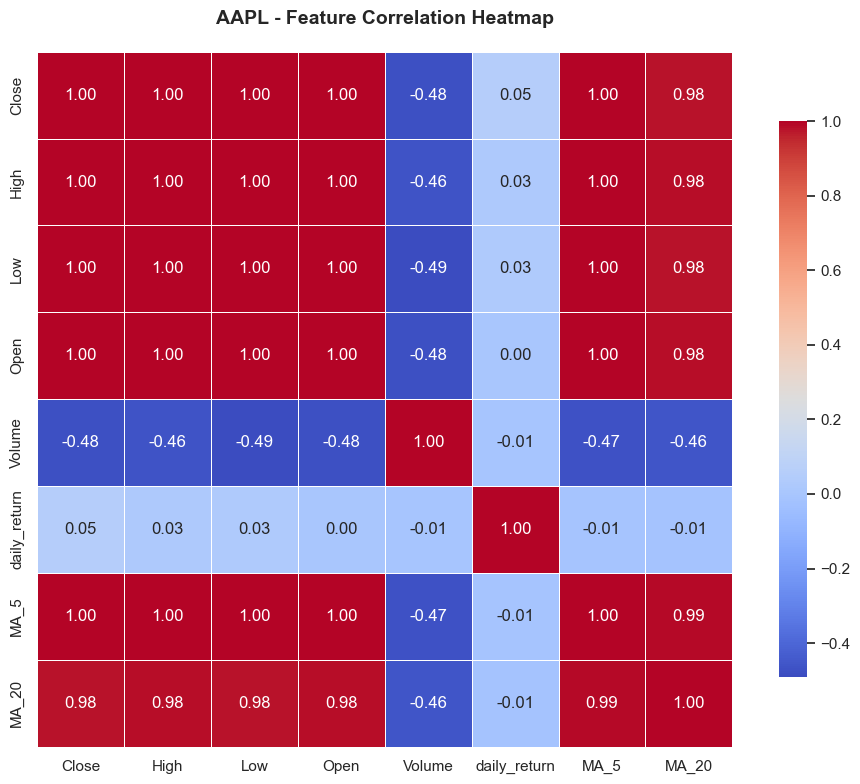

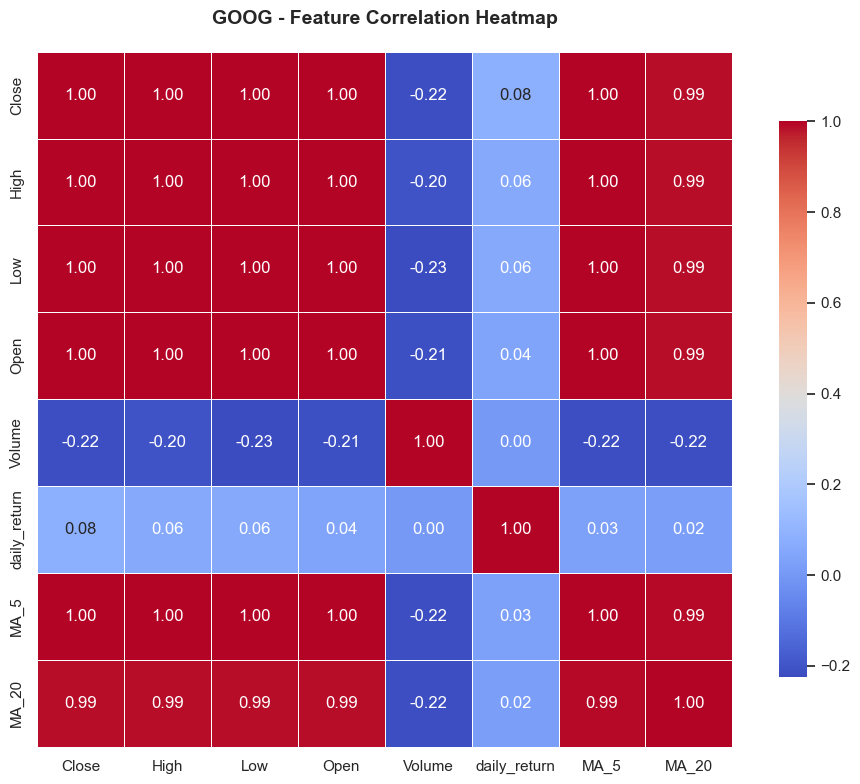

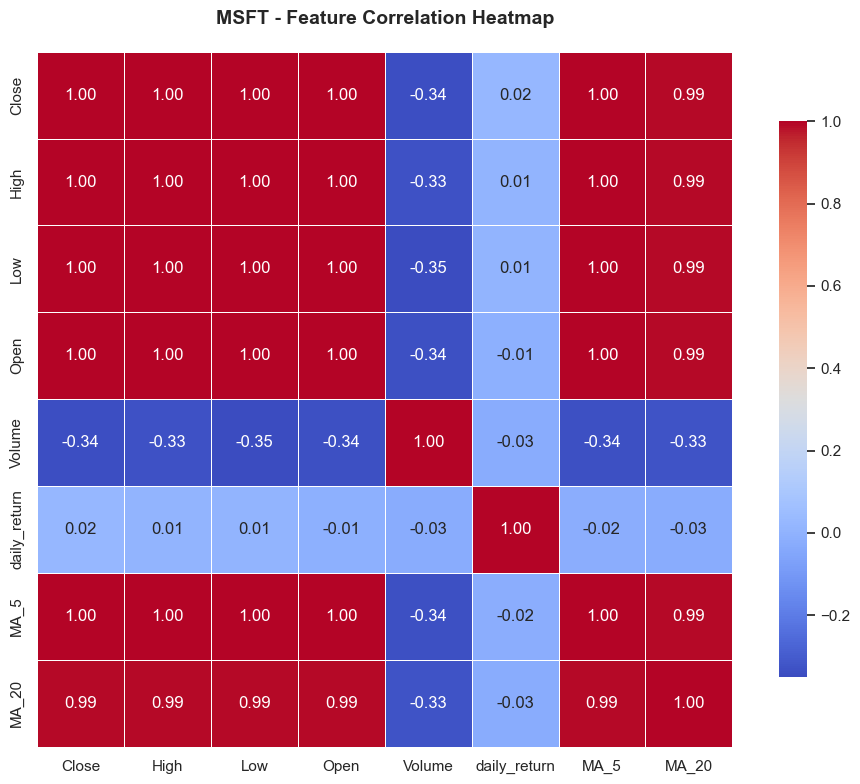

In [46]:
# Cell 12: Correlation Heatmap - Selected Tickers
for ticker in selected_tickers:
    df = preprocessed_data[ticker]
    numeric_cols = df.select_dtypes(include='number').columns
    
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
                    square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
        plt.title(f'{ticker} - Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()

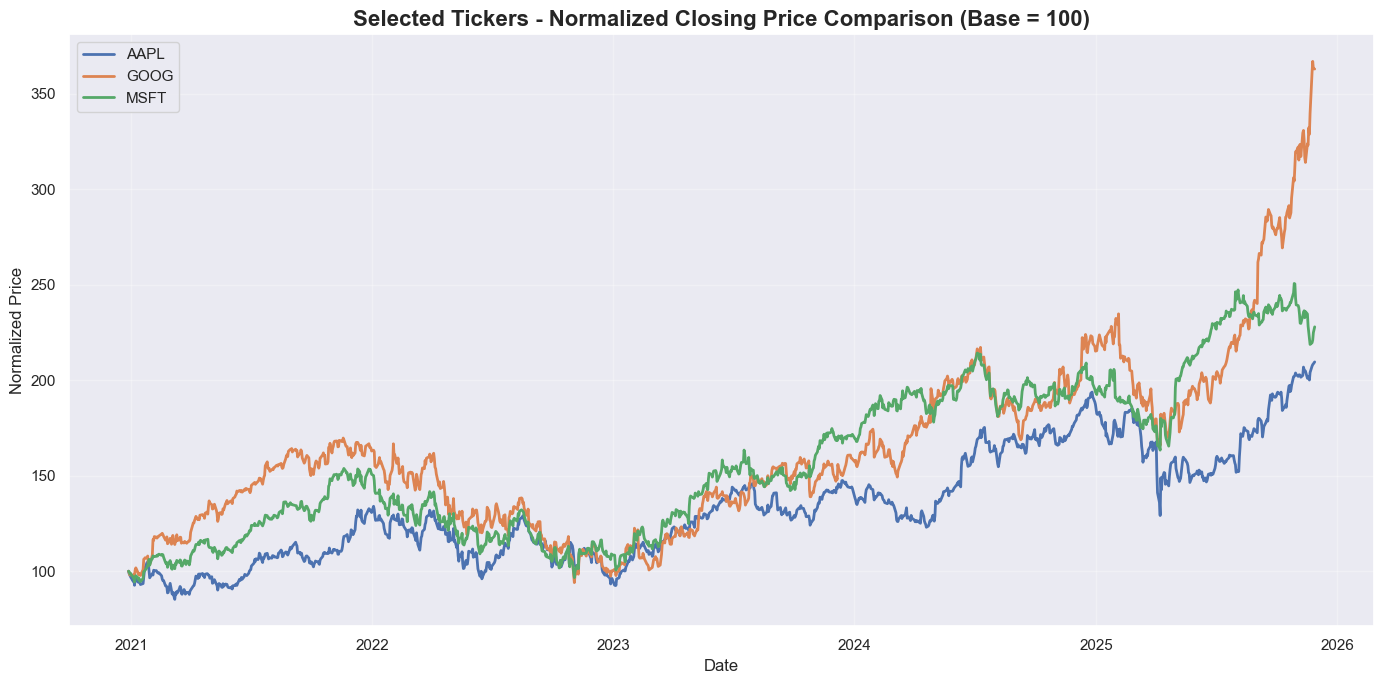

In [47]:
# Cell 13: Compare Selected Tickers (Normalized Closing Prices)
plt.figure(figsize=(14, 7))

for ticker in selected_tickers:
    df = preprocessed_data[ticker]
    if 'Close' in df.columns and 'Date' in df.columns:
        # Normalize to starting price for comparison
        normalized_close = (df['Close'] / df['Close'].iloc[0]) * 100
        plt.plot(df['Date'], normalized_close, label=ticker, linewidth=2)

plt.title('Selected Tickers - Normalized Closing Price Comparison (Base = 100)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
# Cell 14: Performance metrics for ALL tickers (summary table)
performance_data = []

for ticker, df in preprocessed_data.items():
    if 'Close' in df.columns and len(df) > 0:
        start_price = df['Close'].iloc[0]
        end_price = df['Close'].iloc[-1]
        total_return = ((end_price - start_price) / start_price) * 100
        
        if 'daily_return' in df.columns:
            volatility = df['daily_return'].std() * np.sqrt(252) * 100  # Annualized
            sharpe = (df['daily_return'].mean() / df['daily_return'].std()) * np.sqrt(252) if df['daily_return'].std() > 0 else 0
        else:
            volatility = None
            sharpe = None
        
        performance_data.append({
            'Ticker': ticker,
            'Start Price': round(start_price, 2),
            'End Price': round(end_price, 2),
            'Total Return %': round(total_return, 2),
            'Volatility %': round(volatility, 2) if volatility else 'N/A',
            'Sharpe Ratio': round(sharpe, 2) if sharpe else 'N/A'
        })

perf_df = pd.DataFrame(performance_data).sort_values('Total Return %', ascending=False)
print("="*100)
print("PERFORMANCE SUMMARY - ALL TICKERS")
print("="*100)
print(perf_df.head(20).to_string(index=False))
if len(perf_df) > 20:
    print(f"\n... and {len(perf_df) - 20} more tickers")

PERFORMANCE SUMMARY - ALL TICKERS
Ticker  Start Price  End Price  Total Return %  Volatility %  Sharpe Ratio
  GOOG        88.20     320.12          262.94         31.08          1.01
  MSFT       215.86     492.01          127.93         25.82          0.79
  AAPL       133.06     278.85          109.57         28.09          0.70


In [49]:
# Cell 15: Top/Bottom performers
perf_df = pd.DataFrame(performance_data).sort_values('Total Return %', ascending=False)

print("="*80)
print("🚀 TOP 10 PERFORMERS")
print("="*80)
print(perf_df.head(10)[['Ticker', 'Total Return %', 'Volatility %']].to_string(index=False))

print("\n" + "="*80)
print("📉 BOTTOM 10 PERFORMERS")
print("="*80)
print(perf_df.tail(10)[['Ticker', 'Total Return %', 'Volatility %']].to_string(index=False))

🚀 TOP 10 PERFORMERS
Ticker  Total Return %  Volatility %
  GOOG          262.94         31.08
  MSFT          127.93         25.82
  AAPL          109.57         28.09

📉 BOTTOM 10 PERFORMERS
Ticker  Total Return %  Volatility %
  GOOG          262.94         31.08
  MSFT          127.93         25.82
  AAPL          109.57         28.09


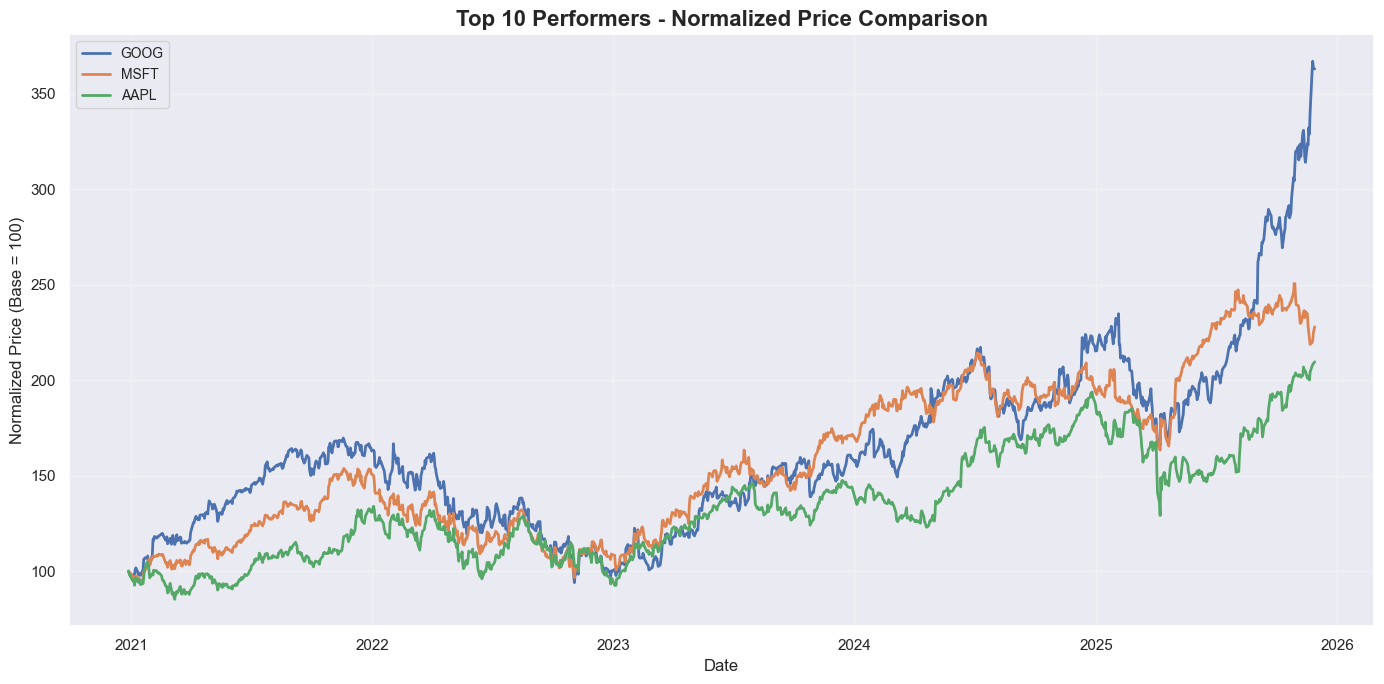

In [50]:
# Cell 16: Visualize top performers
top_n = 10
top_performers = perf_df.head(top_n)['Ticker'].tolist()

plt.figure(figsize=(14, 7))

for ticker in top_performers:
    if ticker in preprocessed_data:
        df = preprocessed_data[ticker]
        if 'Close' in df.columns and 'Date' in df.columns:
            normalized_close = (df['Close'] / df['Close'].iloc[0]) * 100
            plt.plot(df['Date'], normalized_close, label=ticker, linewidth=2)

plt.title(f'Top {top_n} Performers - Normalized Price Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price (Base = 100)', fontsize=12)
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()